# Анализ бизнес-показателей приложения Procrastinate Pro+

На основе данных о посещениях новых пользователей, привлеченных с 1 мая по 27 октября 2019 года, покупках и рекламных расходах развлекательного приложения Procrastinate Pro+ мы выясним почему средства, вложенные в привлечение новых пользователей, не окупаются. Мы изучим как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

***Задача исследования***

Выявить причины неэффективности привлечения пользователей и сформировать рекомендации для отдела маркетига.

***Ход исследования***

*Проведя обзор и предобработку данных:* выявим пропуски и дубликаты, также преобразуем данные к нужным форматам.

*Проведя исследовательский анализ:* изучим распределение пользователей и платящих пользователей:

- по странам,
- по устройствам,
- по рекламным каналам.

*Проведя анализа бизнес-показателей:* оценим вложения в маркетинг, окупаемость рекламы с помощью LTV и ROI, ответим на следующие вопросы:

1. Окупается ли реклама, направленная на привлечение пользователей в целом?
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
3. Чем могут быть вызваны проблемы окупаемости?

***Этапы исследования***

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Анализ бизнес-показателей.
5. Выводы.

# Описание данных
*В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.*

***Структура visits_info_short.csv:***
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

***Структура orders_info_short.csv:***
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

***Структура costs_info_short.csv:***
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

# Обзор данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# открываем файлы

try:
    visits = pd.read_csv('visits_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
try:
    orders = pd.read_csv('orders_info_short.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
try:
    costs = pd.read_csv('costs_info_short.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
all_data = [visits, orders, costs]

In [4]:
# напишем функцию для обзора данных
def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.isna().sum())

In [5]:
# посмотрим на данные visits
df_review(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
---------------------------------------------------------------------------------------------------------
            User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11
------------------------------------------------------------------------------------------

***Вывод: пропусков в данных нет, столбцы Session Start и Session End нужно привести к типу datetime, также присутствует нарушения стиля — использование заглавных букв и пробелов.***

In [6]:
# посмотрим на данные orders
df_review(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
---------------------------------------------------------------------------------------------------------
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000
---------------------------------------------------------------------------------------------------------
User

***Вывод: пропусков в данных нет, столбец Event Dt нужно привести к типу datetime, присутствует нарушения стиля — использование заглавных букв и пробелов.***

In [7]:
# посмотрим на данные costs
df_review(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
---------------------------------------------------------------------------------------------------------
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000
---------------------------------------------------------------------------------------------------------
dt         0
Channel    0
costs      0
dtype: int64


***Вывод: пропусков в данных нет, столбец dt нужно привести к типу datetime, присутствует нарушения стиля — использование заглавных букв.***

# Предобработка данных

Преобразуем название всех столбцов к верному формату

In [8]:
# Приведем названия столбцов к нижнему регистру и заменим пробелы нижним подчеркиванием

for data in all_data:
    data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]

In [9]:
# проверим на одном из датасетов
visits.sample(5)

,user_id,region,device,channel,session_start,session_end
292476,360264364130,Germany,iPhone,organic,2019-10-03 23:13:16,2019-10-03 23:47:56
160351,177439831839,United States,Android,FaceBoom,2019-09-26 09:26:19,2019-09-26 12:03:41
130843,54185421704,United States,Android,YRabbit,2019-09-01 16:30:52,2019-09-01 17:12:50
227164,209673487457,UK,PC,lambdaMediaAds,2019-06-10 15:24:16,2019-06-10 15:50:01
286264,956138965735,France,PC,organic,2019-09-25 10:00:07,2019-09-25 10:11:54


Приведем к типу datetime нужные столбцы

In [10]:
# Приведем к типу datetime нужные столбцы с помощью pd.to_datetime
visits[['session_start', 'session_end']] = visits[['session_start', 'session_end']].apply(pd.to_datetime)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим дубликаты

In [11]:
visits.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
costs.duplicated().sum()

0

***Вывод: явные дубликаты в датафреймах отсутствуют.***

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Создадим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей
Для создания профилей пользователей необходимо:

1. Получить данные журнала посещений.
2. Для каждого пользователя определить дату и время первой сессии.
3. Для каждого пользователя определить соответствующие задаче параметры первой сессии. Например, источник перехода на сайт.
4. Для каждого пользователя определить стоимость привлечения.
5. Посчитать количество привлечённых пользователей для каждой даты и источника и сопоставить данные.


Аргументы функции get_profiles().:

- visits — данные журнала посещений,
- orders — данные журнала покупок,
- costs — данные о затратах на маркетинг.

In [14]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета и анализа Retention Rate
Для расчета Retention Rate (коэффициента удержания), необходимо разделить количество активных пользователей на текущий день на количество активных пользователей в первый день. В когортном анализе операцию нужно провести со всеми когортами.
Что нужно сделать:

1. Получить журнал сессий и профили пользователей.
2. Объединить данные сессий с профилями.
3. Рассчитать лайфтайм пользователя для каждой сессии.
4. Построить таблицу удержания. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
5. Вычислить размеры когорт и занести результаты в отдельную таблицу.
6. Объединить таблицы размеров когорт и удержания.
7. Разделить каждую «ячейку» таблицы удержания на соответствующий размер когорты.


Составим функцию get_retention() 

Её аргументы:

- profiles — профили пользователей,
- visits — данные журнала сессий,
- observation_date — момент анализа,
- horizon_days — горизонт анализа в днях,
- dimensions=[] — группировка по желаемым признакам,
- ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

In [15]:
# функция для расчёта удержания

def get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета и анализа Conversion Rate
Для расчета Conversion Rate (коэффициент конверсии), нужно разделить накопленное количество новых покупателей на текущий день на количество активных пользователей в первый день. В когортном анализе расчёт усложняется, потому что операцию нужно провести со всеми когортами.

Что нужно сделать:

1. Получить пользовательские профили и данные о покупках.
2. Найти дату и время первой покупки для каждого пользователя.
3. Добавить данные о покупках в профили.
4. Рассчитать лайфтайм пользователя для каждой покупки.
5. Построить таблицу конверсии. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
6. Посчитать сумму с накоплением для каждой строки таблицы конверсии.
7. Вычислить размеры когорт и занести результаты в отдельную таблицу.
8. Объединить таблицы размеров когорт и конверсии.
9. Разделить каждую «ячейку» таблицы конверсии на соответствующий размер когорты.

Составим функция get_conversion() 

Её аргументы:

- profiles — профили пользователей,
- orders — данные журнала покупок,
- observation_date — момент анализа,
- horizon_days — горизонт анализа в днях,
- dimensions=[] — группировка по желаемым признакам,
- ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

In [16]:
def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # найдем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавим данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитаем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # посчитаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединим таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключим все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстановим размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получим таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получим таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета и анализа LTV и ROI

Чтобы рассчитать LTV (Lifetime Value) и ROI (Return On Investments), понадобятся профили пользователей и данные о стоимости совершённых покупок. Для расчета ROI нам понадобится расчитать CAC (Customer Aquisition Cost).

Что нужно сделать:

1. Получить пользовательские профили и данные о покупках.
2. Добавить данные о покупках в профили.
3. Рассчитать лайфтайм пользователя для каждой покупки.
4. Построить таблицу выручки. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — выручка.
5. Посчитать сумму с накоплением для каждой строки таблицы выручки.
6. Вычислить размеры когорт и занести результаты в отдельную таблицу.
7. Объединить таблицы размеров когорт и выручки.
8. Вычислить CAC: разделить рекламные расходы на количество новых пользователей.
9. Добавить CAC для каждой даты привлечения и источника в профили.
10. Посчитать LTV: разделить каждую «ячейку» таблицы выручки на соответствующий размер когорты.
11. Посчитать ROI: разделить LTV на CAC.

Составим функцию get_ltv().

Её аргументы:

- profiles — профили пользователей,
- orders — данные журнала покупок,
- observation_date — момент анализа,
- horizon_days — горизонт анализа в днях,
- dimensions=[] — группировка по желаемым признакам,
- ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

In [17]:
def get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # добавим в профили время совершения покупок и выручку
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # рассчитаем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построим таблицу выручки
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # посчитаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединим размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # посчитаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания датафрейма

Составим функцию для сглаживания датафрейма filter_data(). Она нам понадобится при последующей визуализации графиков динамических метрик.

Аргументы:

- df — нужный нам датафрейм,
- window — ширина окна сглаживания.

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

Составим функцию для визуализации удержания plot_retention().

Её аргументы:

- retention — таблица удержания,
- retention_history — таблица динамики удержания,
- horizon — день жизни, по которому хотим изучить динамику удержания,
- window=7 — ширина окна сглаживания.

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии

Составим функцию для визуализации конверсии plot_conversion().

Аргументы:

- conversion — таблица конверсии,
- conversion_history — таблица динамики конверсии,
- horizon — день жизни, по которому хотим изучить динамику конверсии,
- window=7 — ширина окна сглаживания.

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

Составим функцию для визуализации LTV и ROI plot_ltv_roi().

Аргументы:

- ltv — таблица LTV,
- ltv_history — таблица динамики LTV,
- roi — таблица ROI,
- roi_history — таблица динамики ROI,
- horizon — день жизни, по которому хотим изучить динамику LTV и ROI,
- window=7 — ширина окна сглаживания.

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

***Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.***

In [22]:
# выведем результат функции get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head()
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [23]:
print(f'Минимальная дата привлечения пользователей:', profiles['dt'].min())
print(f'Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


***Вывод: Минимальная дата привлечения пользователей: 2019-05-01, Максимальная дата привлечения пользователей: 2019-10-27. Все соответствует ТЗ.***

***Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.***

In [24]:
# сводная таблица пользователей по странам
pivot_country = (
    profiles.pivot_table(index = 'region', values = 'user_id', aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
# доля по странам
pivot_country['share_%'] = round(pivot_country['unique_users']/pivot_country['unique_users'].sum()*100, 2)
pivot_country

,region,unique_users,share_%
0,United States,100002,66.66
1,UK,17575,11.72
2,France,17450,11.63
3,Germany,14981,9.99


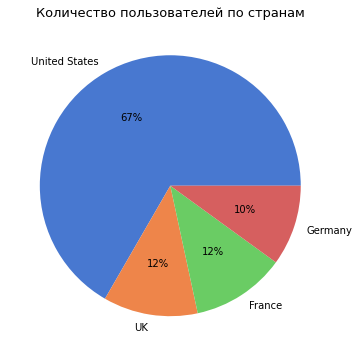

In [25]:
# визуализируем для наглядности
# задаем цвета
colors = sns.color_palette('muted')[ 0:4 ]
plt.figure(figsize=(10,6))
# построим круговую диаграмму
plt.pie(pivot_country['share_%'], labels = pivot_country['region'], colors = colors, autopct='%.0f%%')
plt.title('Количество пользователей по странам', fontsize=13)
plt.show()

In [26]:
# сводная таблица платящих пользователей по странам
payers_pivot_country = (
    profiles.loc[profiles['payer'] == True].pivot_table(index = 'region', values = 'user_id', aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'payers_unique_users'})
    .reset_index()
)
# доля платящих по странам
payers_pivot_country['share_%'] = round(payers_pivot_country['payers_unique_users']/pivot_country['unique_users']*100, 2)
payers_pivot_country

,region,payers_unique_users,share_%
0,United States,6902,6.90
1,UK,700,3.98
2,France,663,3.80
3,Germany,616,4.11


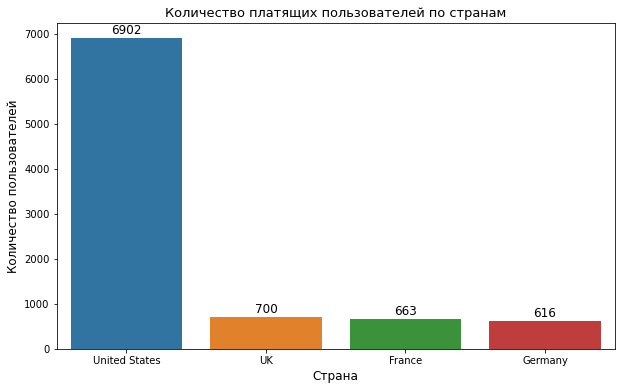

In [27]:
# построим график количества платящих пользователей по странам
plt.figure(figsize=(10,6))
plots = sns.barplot(x='region', y='payers_unique_users', data=payers_pivot_country)
# добавление подписей к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество платящих пользователей по странам', fontsize=13)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.show()

***Вывод: Из графиков видно, что наибольшее число пользователей (66.7% от общего количества, из которых 6.9% платящих пользователей) приходится на США. Великобритания, Франция и Германия дают приблизительно равное количество пользователей.***


Выясним какими устройствами пользуются посетители и с каких устройств заходит больше всего платящих пользователей.

In [28]:
# сводная таблица для устройств
pivot_devices = (
    profiles.pivot_table(index = 'device', values = 'user_id', aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
# доля по странам
pivot_devices['share_%'] = round(pivot_devices['unique_users']/pivot_devices['unique_users'].sum()*100, 2)
pivot_devices

,device,unique_users,share_%
0,iPhone,54479,36.32
1,Android,35032,23.35
2,PC,30455,20.30
3,Mac,30042,20.03


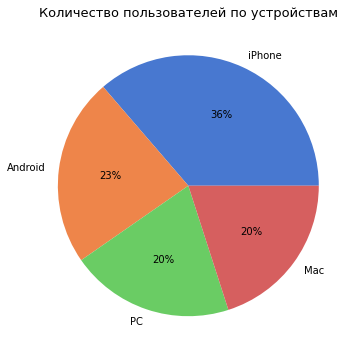

In [29]:
# визуализируем для наглядности
# задаем цвета
colors = sns.color_palette('muted')[ 0:4 ]
plt.figure(figsize=(10,6))
# построим круговую диаграмму
plt.pie(pivot_devices['share_%'], labels = pivot_devices['device'], colors = colors, autopct='%.0f%%')
plt.title('Количество пользователей по устройствам', fontsize=13)
plt.show()

In [30]:
# сводная таблица платящих пользователей по странам
payers_pivot_devices = (
    profiles.loc[profiles['payer'] == True].pivot_table(index = 'device', values = 'user_id', aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'payers_unique_users'})
    .reset_index()
)
# доля платящих по странам
payers_pivot_devices['share_%'] = round(payers_pivot_devices['payers_unique_users']/pivot_devices['unique_users']*100, 2)
payers_pivot_devices

,device,payers_unique_users,share_%
0,iPhone,3382,6.21
1,Android,2050,5.85
2,Mac,1912,6.28
3,PC,1537,5.12


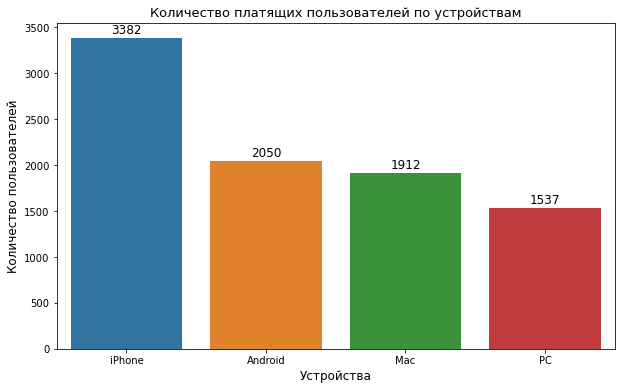

In [31]:
# построим график количества платящих пользователей по устройствам
plt.figure(figsize=(10,6))
plots = sns.barplot(x='device', y='payers_unique_users', data=payers_pivot_devices)
# добавление подписей к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество платящих пользователей по устройствам', fontsize=13)
plt.xlabel('Устройства', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.show()

***Вывод: Из графиков видно, что наибольшее число пользователей (36.3% от общего количества) заходят с iPhone. Android, PC и Mac дают приблизительно равное количество пользователей. Все платформы дают приблизительно равное количество платящих пользователей, около 5-6 %.***

***Определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.***

In [32]:
# Сводная таблица c уникальными пользователями с разбивкой по каналам привлечения
pivot_channels = (
    profiles.pivot_table(index = 'channel', values = 'user_id', aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
# доля по странам
pivot_channels['share_%'] = round(pivot_channels['unique_users']/pivot_channels['unique_users'].sum()*100, 2)
pivot_channels

,channel,unique_users,share_%
0,organic,56439,37.62
1,FaceBoom,29144,19.43
2,TipTop,19561,13.04
3,OppleCreativeMedia,8605,5.74
4,LeapBob,8553,5.70
5,WahooNetBanner,8553,5.70
6,RocketSuperAds,4448,2.97
7,MediaTornado,4364,2.91
8,YRabbit,4312,2.87
9,AdNonSense,3880,2.59


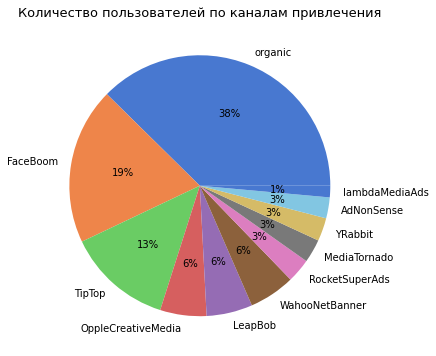

In [33]:
# визуализируем для наглядности
# задаем цвета
colors = sns.color_palette('muted')[ 0:10 ]
plt.figure(figsize=(10,6))
# построим круговую диаграмму
plt.pie(pivot_channels['share_%'], labels = pivot_channels['channel'], colors = colors, autopct='%.0f%%')
plt.title('Количество пользователей по каналам привлечения', fontsize=13)
plt.show()

In [34]:
# Сводная таблица c уникальными платящими пользователями с разбивкой по каналам привлечения
payer_pivot_channels = (
    profiles.loc[profiles['payer'] == True].pivot_table(index = 'channel', values = 'user_id', aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'payer_unique_users'})
    .reset_index()
)

# добавим столбец с расчетом отношения количества платящих пользователей
# к количеству пользователей с разбивкой по каналам привлечения
# через merge
payer_pivot_channels = payer_pivot_channels.merge(
    pivot_channels[['channel', 'unique_users']],
    on='channel'
)

# доля по странам
payer_pivot_channels['share_%'] = round(payer_pivot_channels['payer_unique_users']/payer_pivot_channels['unique_users']*100, 2)
# удалим столбец unique_users
payer_pivot_channels = payer_pivot_channels.drop(columns = 'unique_users').sort_values(by='payer_unique_users', ascending=False)
payer_pivot_channels

,channel,payer_unique_users,share_%
0,FaceBoom,3557,12.20
1,TipTop,1878,9.60
2,organic,1160,2.06
3,WahooNetBanner,453,5.30
4,AdNonSense,440,11.34
5,RocketSuperAds,352,7.91
6,LeapBob,262,3.06
7,OppleCreativeMedia,233,2.71
8,lambdaMediaAds,225,10.47
9,YRabbit,165,3.83


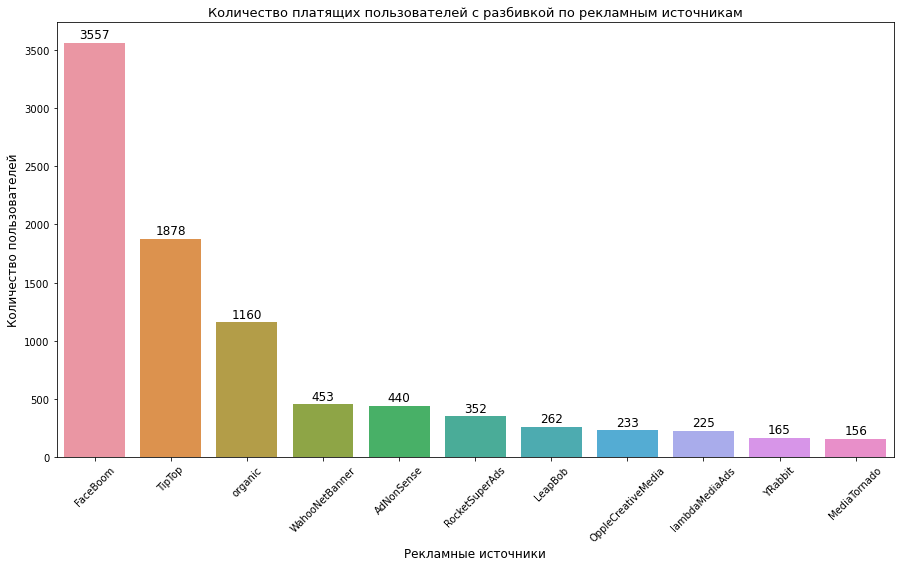

In [35]:
# график количества платящих пользователей с разбивкой по каналам привлечения
plt.figure(figsize=(15,8))
plots = sns.barplot(x='channel', y='payer_unique_users', data=payer_pivot_channels)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество платящих пользователей с разбивкой по рекламным источникам', fontsize=13)
plt.xlabel('Рекламные источники', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Количество пользователей', fontsize=12)

plt.show()

***Вывод:*** 

По уникальным пользователям топ-3:

- organic - 37.6%,
- FaceBoom - 19.4%,
- TipTop - 13%.

По платящим пользователям топ-3:

- FaceBoom - 12.2%,
- TipTop - 9.6%,
- organic - 2.1%.

***Вывод общий:*** 
- Наибольшее количество пользователей приходит из США, с устройства iPhone, с organic и через рекламные каналы FaceBoom и TipTop.
- Наибольшее количество платящих пользователей приходит из США, с устройства iPhone, через рекламные каналы FaceBoom и TipTop и с organic.

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

Напишите промежуточные выводы.

***Общая сумма расходов на маркетинг***

In [36]:
#исключим пользователей с органическим трафиком поскольку мы за них ничего не платим
profiles = profiles.query('channel != "organic"')

In [37]:
#Для расчета общей суммы расходов воспользуемся данными из таблицы costs.
total_sum = round(costs['costs'].sum())
print(f'Общая сумма расходов на маркетинг:', total_sum)

Общая сумма расходов на маркетинг: 105497


***Определим траты по каждому источнику***

In [38]:
# делаем сводную таблицу c суммой потраченных финансов с 
# разбивкой по каналам

costs_pivot_channel = (
    costs.pivot_table(
        index = 'channel', # каналы рекламы
        values = 'costs', # траты на эти каналы
        aggfunc = 'sum' # сумма трат
    )
    .sort_values(by='costs', ascending = False)
    .rename(columns={'costs': 'sum_costs'})
    .reset_index()
)
costs_pivot_channel['share_%'] = round(
    costs_pivot_channel['sum_costs'] /
    costs_pivot_channel['sum_costs'].sum()*100, 2)
costs_pivot_channel

,channel,sum_costs,share_%
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


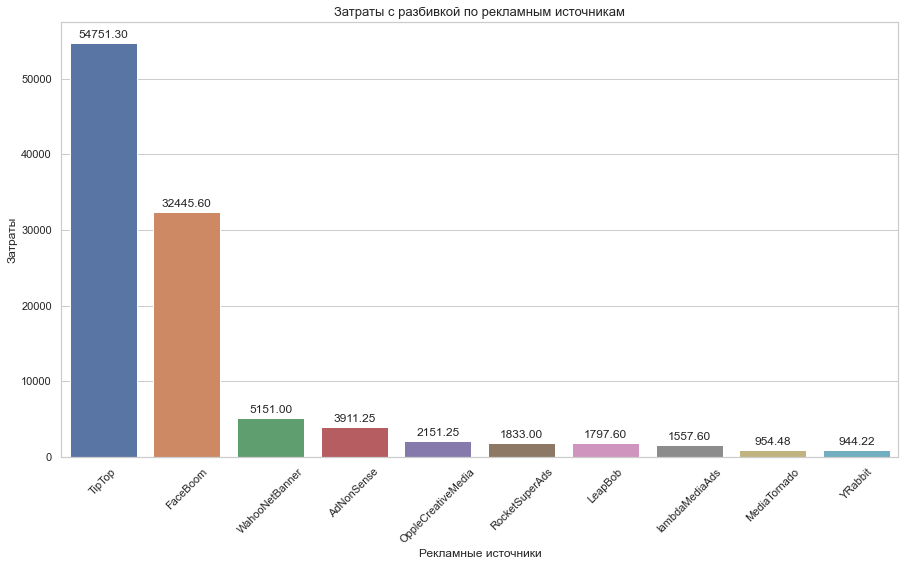

In [39]:
# график суммы потраченных финансов с разбивкой по каналам привлечения
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='channel', y='sum_costs', data=costs_pivot_channel)
# добавление подписей к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Затраты с разбивкой по рекламным источникам', fontsize=13)
plt.xlabel('Рекламные источники', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Затраты', fontsize=12)
plt.show()

***Построим визуализацию динамики изменения расходов во времени по каждому источнику***

In [40]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [41]:
# преобразуем dt к типу datetime
costs['dt'] = pd.to_datetime(costs['dt'])
# добавим столбцы с месяцем и неделей
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].dt.isocalendar().week
costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,18
1,2019-05-02,FaceBoom,78.1,2019-05-01,18
2,2019-05-03,FaceBoom,85.8,2019-05-01,18
3,2019-05-04,FaceBoom,136.4,2019-05-01,18
4,2019-05-05,FaceBoom,122.1,2019-05-01,18


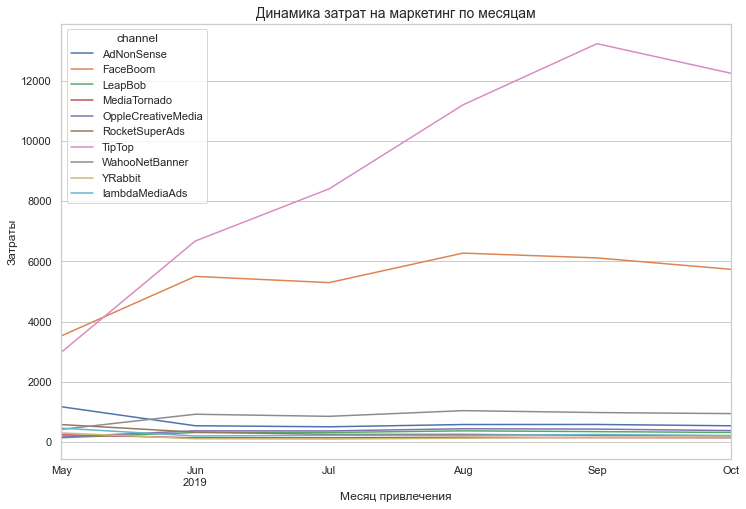

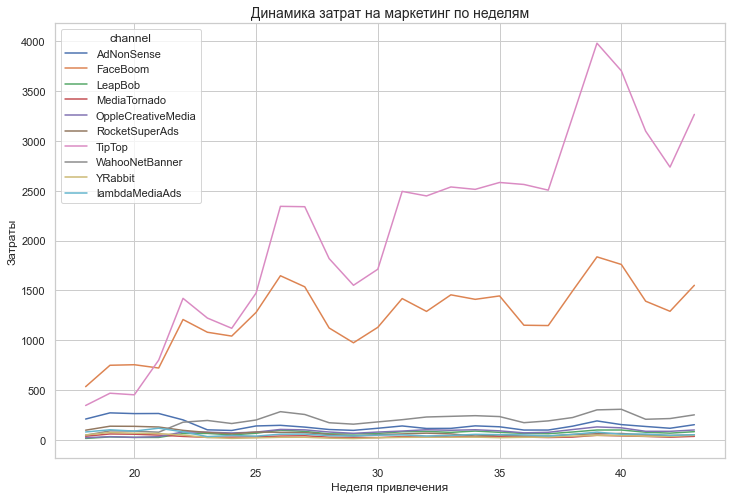

In [42]:
# сводная таблица с суммой потраченных финансов с разбивкой по месяцам
costs_in_dynamic = (
    costs.pivot_table(
        index = 'month', # даты первых посещений
        columns='channel',
        values = 'costs', # траты на рекламу
        aggfunc = 'sum' # сумма трат
    )
)
# построение графика суммы потраченных финансов с разбивкой по месяцам
costs_in_dynamic.plot(figsize=(12, 8), grid=True)
plt.title('Динамика затрат на маркетинг по месяцам', fontsize=14)
plt.xlabel('Месяц привлечения', fontsize=12)
plt.ylabel('Затраты', fontsize=12)

# сводная таблица с суммой потраченных финансов с разбивкой по дням
costs_in_dynamic_week = (
    costs.pivot_table(
        index = 'week', # даты первых посещений
        columns='channel',
        values = 'costs', # траты на рекламу
        aggfunc = 'sum' # сумма трат
    )
)
# построение графика суммы потраченных финансов с разбивкой по дням
costs_in_dynamic_week.plot(figsize=(12, 8), grid=True)
plt.title('Динамика затрат на маркетинг по неделям', fontsize=14)
plt.xlabel('Неделя привлечения', fontsize=12)
plt.ylabel('Затраты', fontsize=12)

plt.show()

***Вывод:*** Наибольшее количество средств было потрачено на TipTop и FaceBoom. Общие затраты на маркетинг растут на протяжении всего периода. Сезонность не наблюдается. Присутствует некоторый рост затрат в начале каждого месяца. Заметен пик в конце сентября, начале октября. Возможно, в этот период производились попытки улучшения показателей продаж, привлечения новых пользователей.

***Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.***

In [43]:
print('Средний CAC на одного пользователя для всего проекта:', 
      round(profiles['acquisition_cost'].mean(), 2))

Средний CAC на одного пользователя для всего проекта: 1.13


Теперь рассчитаем средний CAC на одного пользователя для каждого источника трафика.

In [44]:
mean_cac_channel = (
    profiles.pivot_table(
        index = 'channel', #источники рекламы
        values = 'acquisition_cost', #траты на рекламу
        aggfunc = 'mean' # среднее значение трат на рекламный источник
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'mean_cac'})
    .reset_index()
)
mean_cac_channel['mean_cac'] = round(mean_cac_channel['mean_cac'], 2)
mean_cac_channel

,channel,mean_cac
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


***Вывод: Рассчитан средний CAC на одного пользователя для всего проекта и он равен 1.13,***

***Топ-3 рекламных канала по величине среднего CAC:***
- TipTop - 2.8
- FaceBoom - 1.11
- AdNonSense - 1.01

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [45]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

In [46]:
profiles['dt'] = pd.to_datetime(profiles['dt'])

In [47]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93569 entries, 0 to 150006
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           93569 non-null  int64         
 1   first_ts          93569 non-null  datetime64[ns]
 2   channel           93569 non-null  object        
 3   device            93569 non-null  object        
 4   region            93569 non-null  object        
 5   dt                93569 non-null  datetime64[ns]
 6   month             93569 non-null  datetime64[ns]
 7   payer             93569 non-null  bool          
 8   acquisition_cost  93569 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 6.5+ MB


### Анализ общей окупаемости рекламы

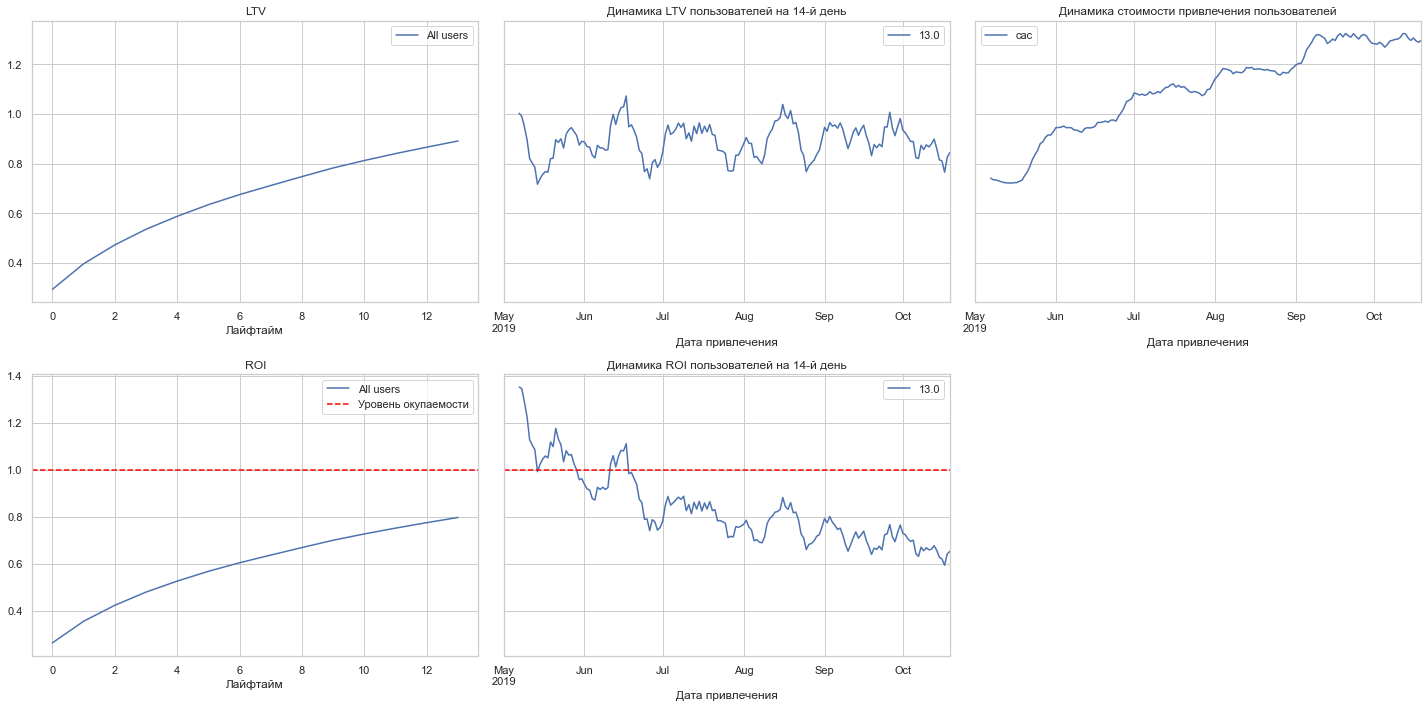

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

***Вывод:***
- Кривая LTV постоянно растёт ожидаемым образом, показатель достаточно стабилен.
- Реклама практически не окупается. ROI в конце двухнедельного периода ниже уровня окупаемости. Динамика ROI постоянно снижается.
- CAC постоянно растет, это означает что рекламный бюджет постоянно увеличивается.

***Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Далее построим графики конверсии и удержания.***

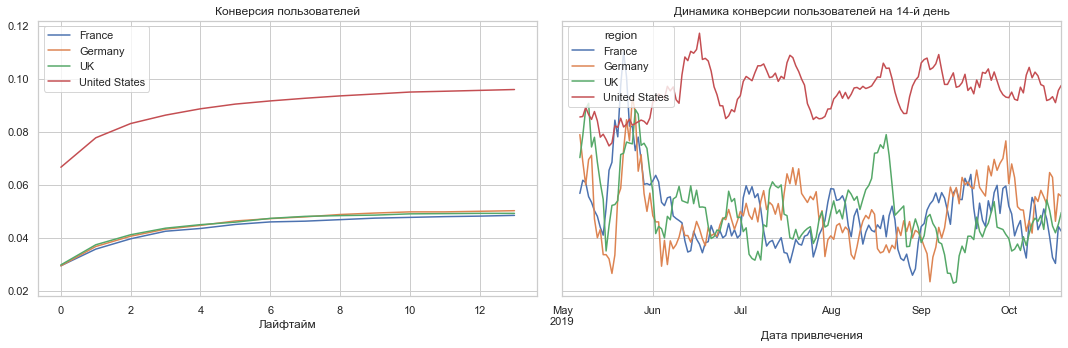

In [49]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

***Вывод:*** Пользователи из США конвертируются очень хорошо, причём постоянно. Нужно смотреть на удержание. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

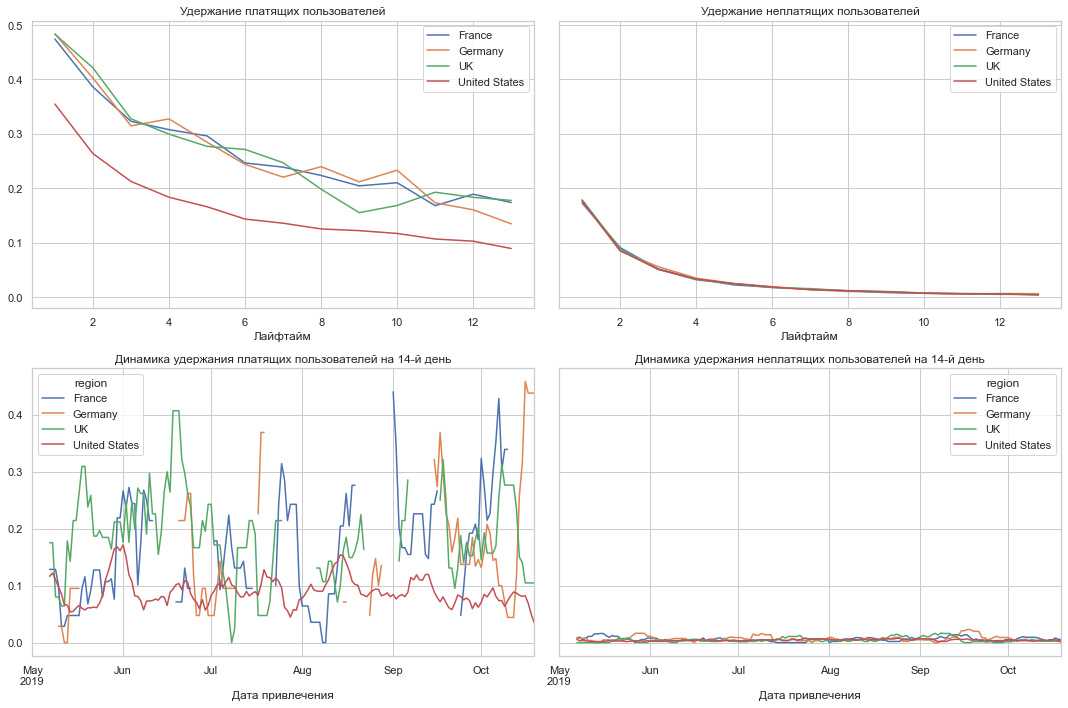

In [50]:
# смотрим удержание с разбивкой по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

***Вывод:*** Пользователи из США удерживаются хуже чем пользователи из других стран. Возможно это связано с устройствами и каналами привлечения. Посмотрим конверсию и удержание с разбивкой по устройствам.

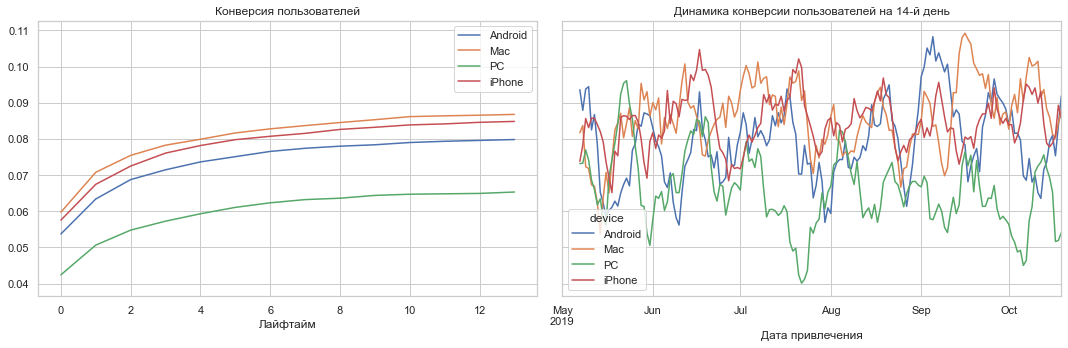

In [51]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

***Вывод:*** Судя по графикам, пользователи iPhone, Mac и Android конвертируются очень хорошо, причём постоянно. Скорее всего, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

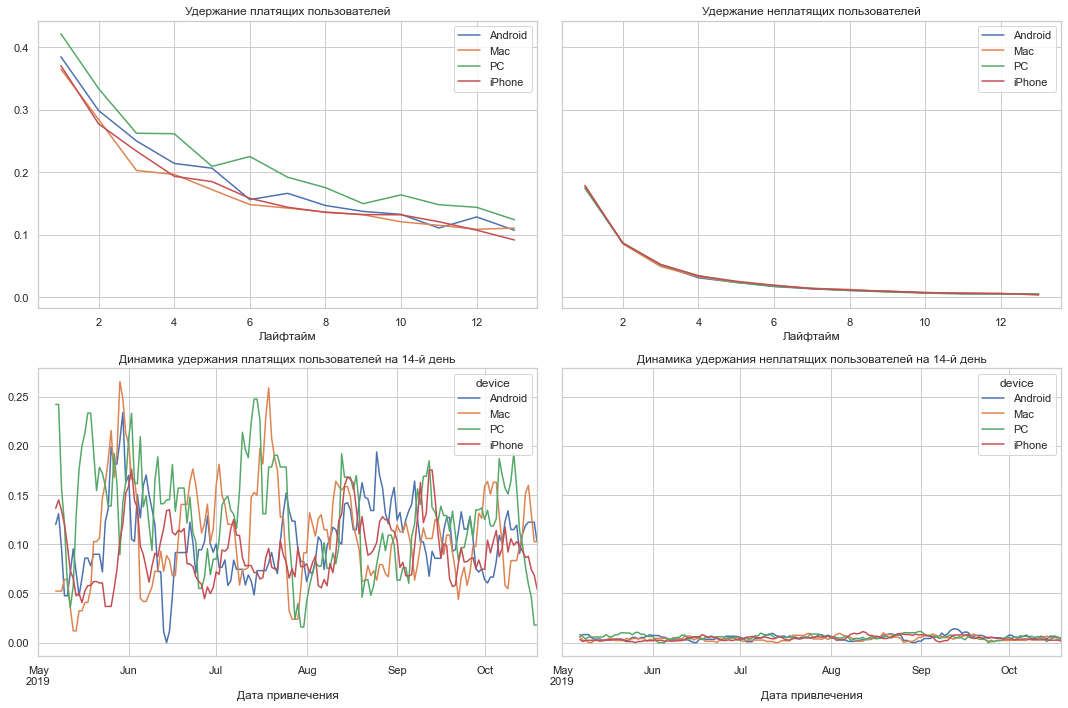

In [52]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

***Вывод:*** Удержание у пользователей iPhone и Mac и у пользователй Android и PC примерно равное. Проверим конверсию и удержание с разбивкой по рекламным каналам.

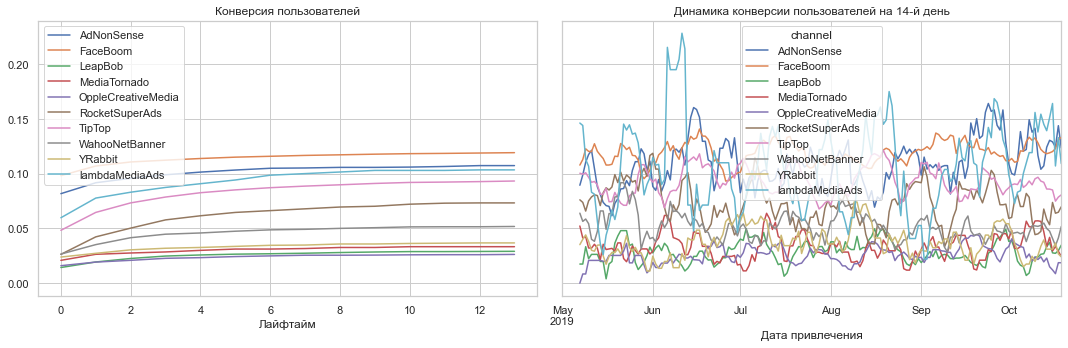

In [53]:
# смотрим конверсию с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

***Вывод:*** Конверсия по всем источникам хоть и низкая, но стабильная. У AdNonSense, FaceBoom и TipTop показатели конверсии выше чем у других источников. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

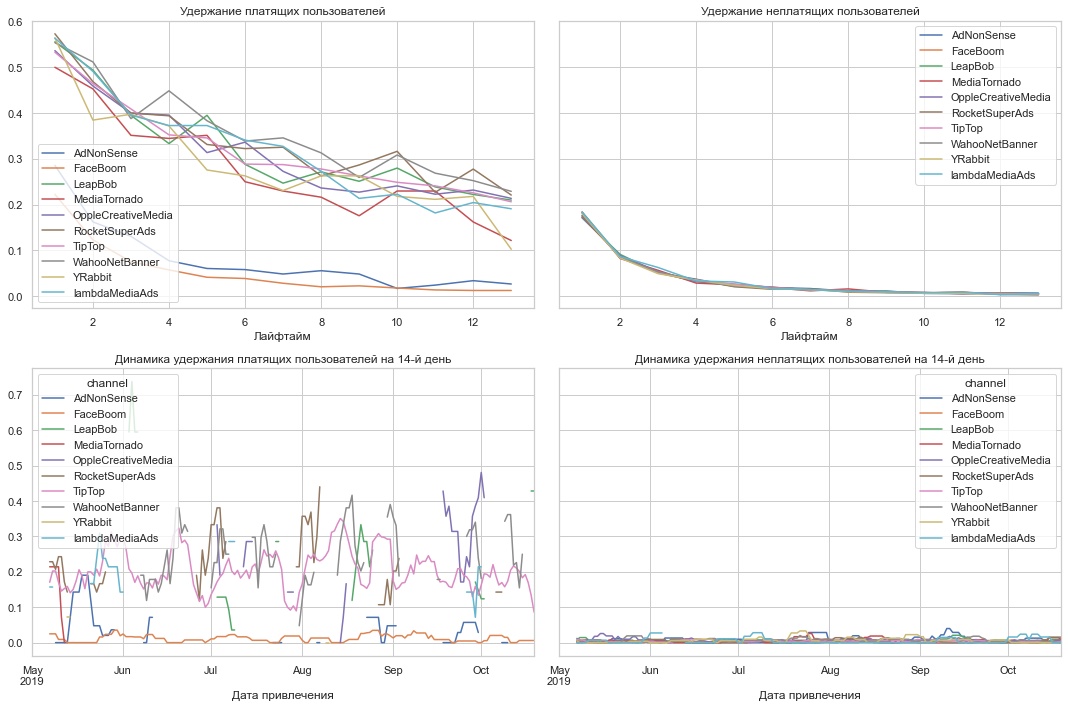

In [54]:
# смотрим удержание с разбивкой по рекламным каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

***Вывод:*** Вот и найдена основная причина - низкое удержание платящих пользователей, привлеченных при помощи AdNonSense и FaceBoom. Как мы помним, эти каналы не окупаются.

## Проанализируем окупаемость рекламы с разбивкой по устройствам, каналам и по странам.

### Анализ окупаемости рекламы с разбивкой по устройствам

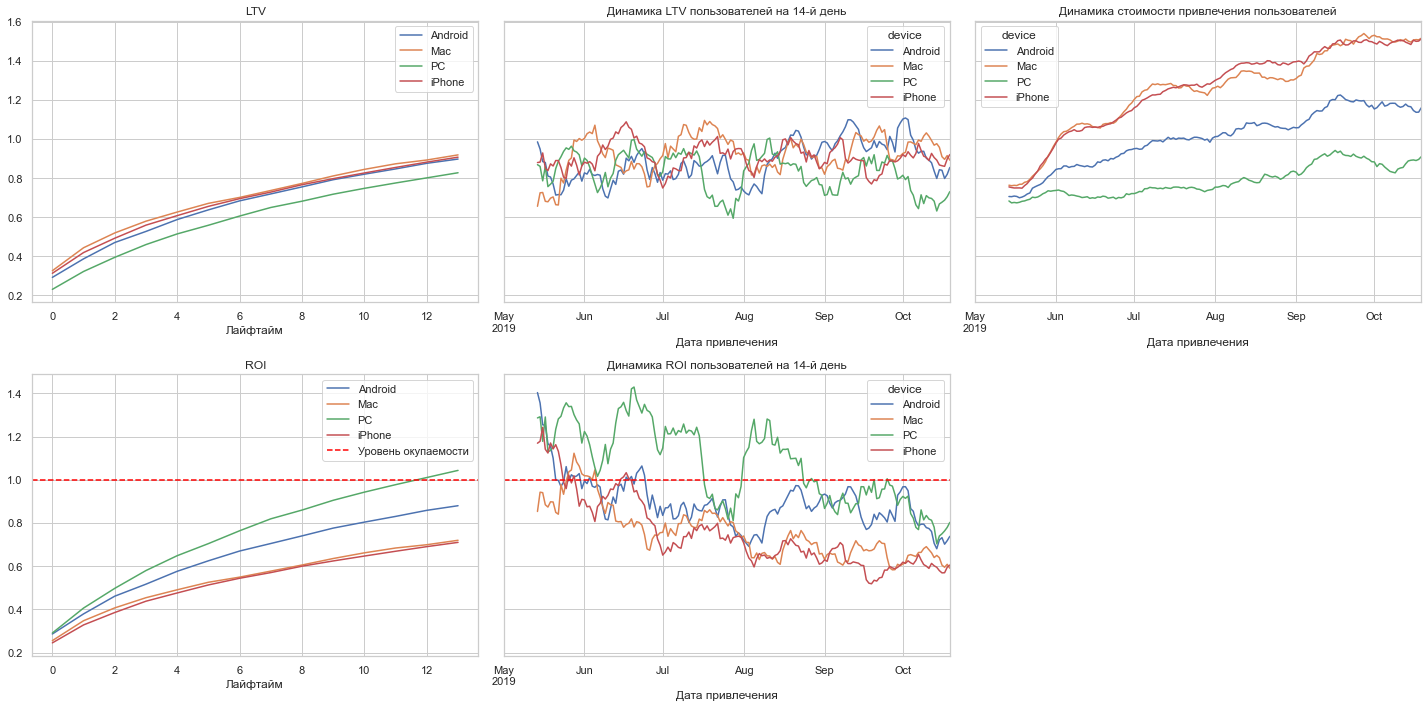

In [55]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

***Вывод:*** Пользователи PC окупаются, владельцы iPhone, Mac и Android - нет.
Рекламные бюджеты растут на всех устройствах, но на iPhone и Mac это выраженно сильнее.

### Анализ окупаемости рекламы с разбивкой по каналам

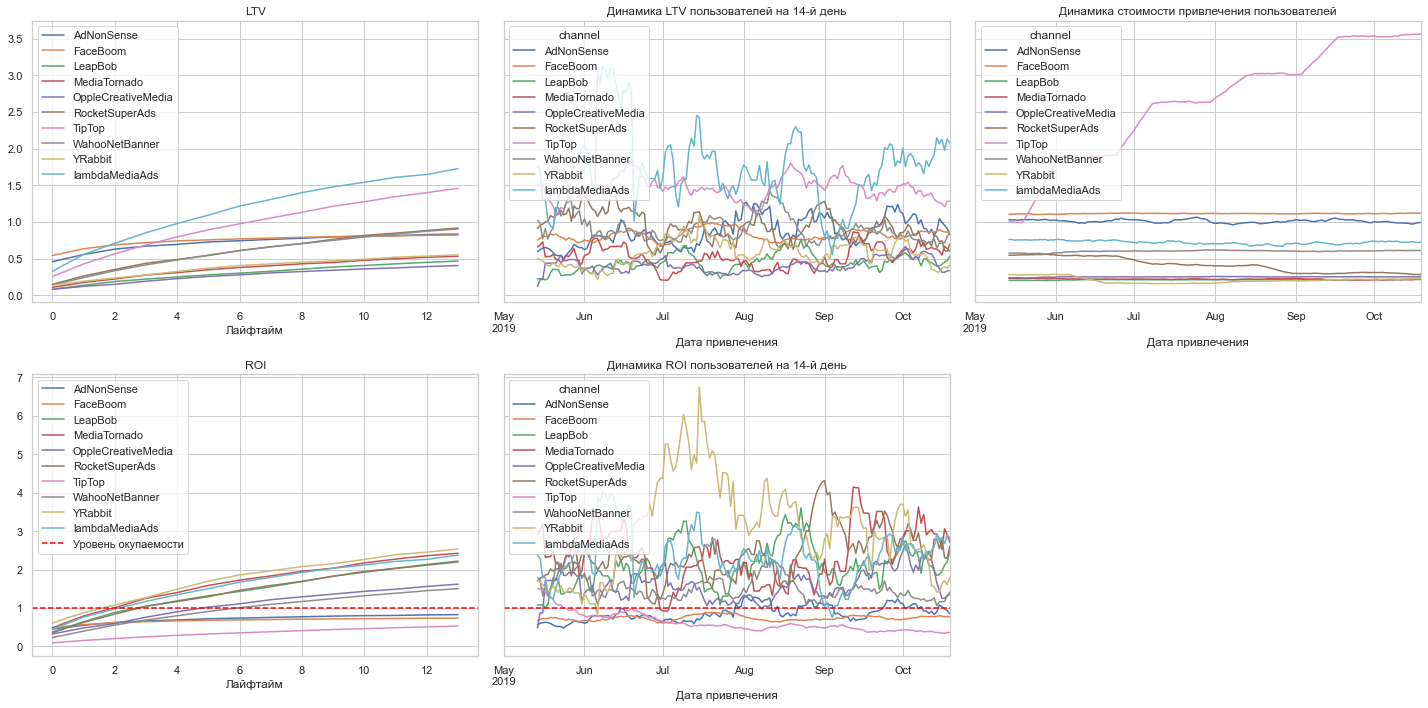

In [56]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

***Вывод:*** С разбивкой по каналам ситуация неоднозначная.
Есть явные аутсайдеры по рекламным каналам. Реклама не окупается на AdNonSense, FaceBoom и TipTop.
На рост рекламного бюджета оказывает сильное влияние постоянно растущий CAC по каналу TipTop. У остальных каналов CAC стабилен.
Лучше всего окупаются YRabbit, MediaTornado и lambdaMediaAds.

### Анализ окупаемости рекламы с разбивкой по странам

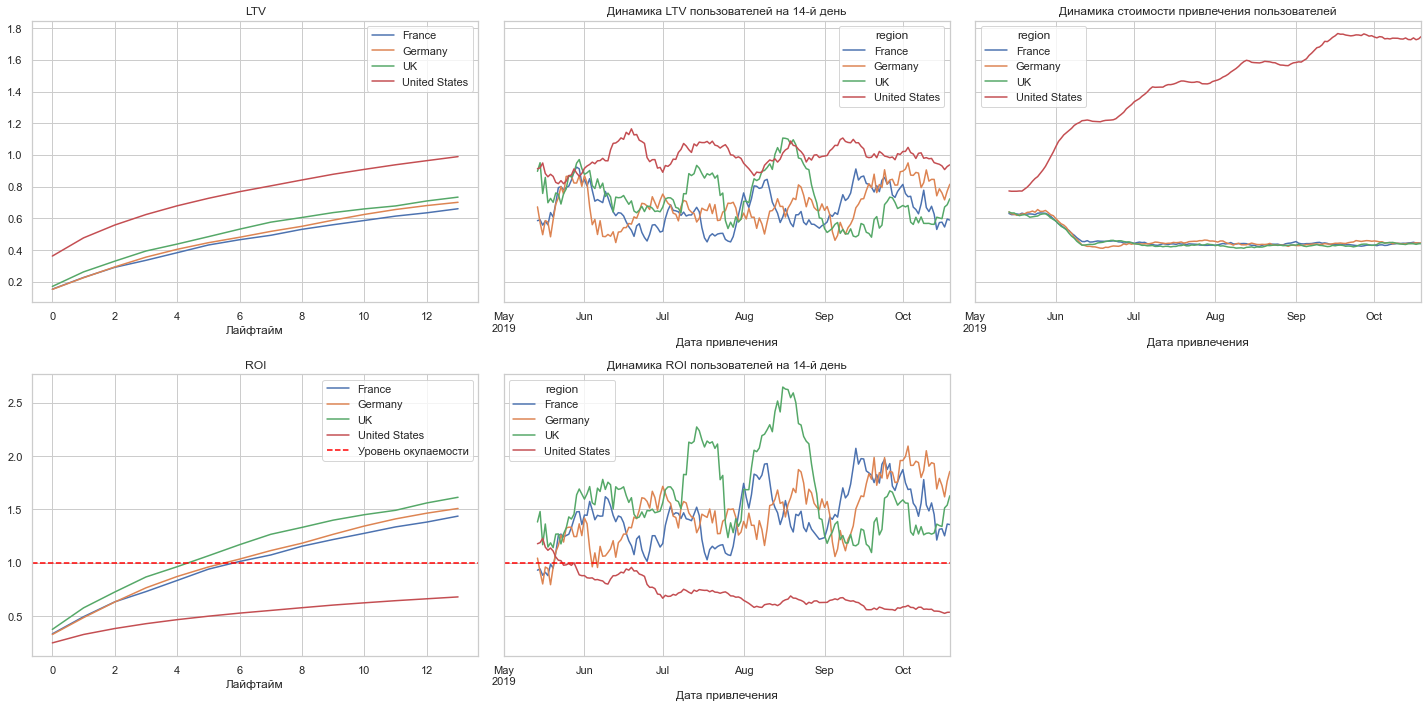

In [57]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

***Вывод:*** Реклама окупается в Великобритании, Германии и Франции. Показатели хорошие.
Реклама в США не окупается. ROI ниже границы окупаемости.
Стоимость привлечения стабильна и одинакова для Франции, Германии и Великобритании. Однако стоимость привлечения пользователей в США сильно выше и постоянно растёт.

***Вывод по анализу окупаемости рекламы:***

Реклама не окупается, неудачная рекламная компания в США (где сосредоточено 66.7% пользователей с наибольшей среди всех стран долей платящих пользователей) вносит коррективы в общие показатели. Также влияние оказывает покупка рекламы в AdNonSense, FaceBoom и TipTop, которая не окупается, хотя и дает в общей сложности 35% пользователей (из которых 11.1% платящие), как и пользователи iPhone, Mac и Android (79.7% пользователей, из которых 6.14% платящие).
Рекламный бюджет постоянно растет, виновники практически те же: США, TipTop, iPhone и Mac.

# Общие выводы:

 - Были сформированы профили пользователей. Определены минимальная и максимальная даты привлечения пользователей. Это 2019-05-01 и 2019-10-27.
 - Реклама не окупается, неудачная рекламная компания в США (где сосредоточено 66.7% пользователей с наибольшей среди всех стран долей платящих пользователей) вносит коррективы в общие показатели. Также влияние оказывает покупка рекламы в AdNonSense, FaceBoom и TipTop, которая не окупается, хотя и дает в общей сложности 35% пользователей (из которых 11.1% платящие), как и пользователи iPhone, Mac и Android (79.7% пользователей, из которых 6.14% платящие). Рекламный бюджет постоянно растет, виновники практически те же: США, TipTop, iPhone и Mac.
 
- Реклама для пользователей iPhone, Mac и Android не окупается, однако здесь достаточно высокая конверсия и стабильное удержание.
- Неверный выбор каналов привлечения пользователей и трат на маркетинг - основной фактор неэффективности привлечения пользователей. 

***Поэтому можно предложить следующие рекомендации для отдела маркетинга:***

1. Отказаться от финансирования рекламных каналов AdNonSense и FaceBoom из-за неокупаемости и плохого удержания пользователей.
2. Увеличить финансирование рекламных каналов RocketSuperAds, WahooNetBanner и lambdaMediaAds т.к. у этих каналов хорошая окупаемость и хорошие показателей конверсии.
3. Снизить финансирование канала TipTop, несмотря на хорошую конверсию и стабильное удержание. Слишком большая сумма из всего рекламного бюджета уходит на этот канал. Нужно снизить показатель CAC.